# Deep Maths

In a show of his, Derren Brown describes a trick about coin tossing. Consider three tosses of a coin. There are 8 possible outcomes. Contestant A must choose a pattern. Let's say they choose H,H,T. Then Contestant B chooses another pattern. The game then is for contestants A and B to repeatedly toss their coins three times; every time the series of tosses is the pattern they chose, they get a point. First contestant to 10 points wins the game.

Apparently, Contestant B can always win by adopting the following strategy. 

  1) Ask Contestant A to choose a pattern. Contestant A must always choose first. 
  
  2) Once Contestant A has chosen, Contestant B chooses their pattern using the following recipe. Supppose Contestant A chose H,H,T. Then take the middle choice, in this case, H, and flip it to the opposite choice -- in this case to a T. Then put this T at the start of the sequence and drop the last choice from Contestant A's list. In this case, following the recipe, Contestant B's choice will be: T,H,H. If Contestant A's choice is T,H,T then Contestant B's choice will be T,T,H.
  
Brown's claim is that Contestant B will always win this game and by a large margin. His explanation is that this is a result of "deep maths". 

Let's find out if this is true.

Also see Singingbanana's description of the problem and the solution to the Penney Ante problem (https://www.youtube.com/watch?v=OcYnlSenF04)

## Load packages

In [1]:
%run include-1-file-paths.ipynb

In [2]:
# Include the setup functions
# See https://stackoverflow.com/questions/14409167/
## How to pass a variable to a magic function
include_setup = os.path.abspath(os.path.join(shared_dir_path, 'Include-Setup-Functions.ipynb'))
%run $include_setup

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# Include the utility functions
# See https://stackoverflow.com/questions/14409167/
## How to pass a variable to a magic function
include_utility = os.path.abspath(os.path.join(shared_dir_path, 'Include-Utility-Functions.ipynb'))
%run $include_utility

In [5]:
# Include the data viz functions
# See https://stackoverflow.com/questions/14409167/
## How to pass a variable to a magic function
include_viz = os.path.abspath(os.path.join(shared_dir_path, 'Include-Viz-Functions.ipynb'))
%run $include_viz

In [10]:
# Include the NLP functions
# See https://stackoverflow.com/questions/14409167/
## How to pass a variable to a magic function
include_nlp = os.path.abspath(os.path.join(shared_dir_path, 'Include-NLP-Functions.ipynb'))
%run $include_nlp

/home/jsub10/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


Loading BokehJS ...

/home/jsub10/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


## The Game

In [102]:
# Number of trials in the game
n_trials = 100

In [103]:
# Contestant A's Choice
A_choice = ['H', 'H', 'H']

In [104]:
# Contestant B's Choice 
## based on Contestant A's choice

# Take the middle element and switch it
## this becomes the first choice
if A_choice[1] == 'H':
    first_choice = 'T'
else:
    first_choice = 'H'
    
B_choice = [first_choice, A_choice[0], A_choice[1]]
print("Contestant A chose: {}\nContestant B chose: {}".format(A_choice, B_choice))

Contestant A chose: ['H', 'H', 'H']
Contestant B chose: ['T', 'H', 'H']


In [105]:
# Generate n_trials for Contestants A and B
A_trials = [np.random.choice(['H', 'T'], 3) for n in range(n_trials)]
B_trials = [np.random.choice(['H', 'T'], 3) for n in range(n_trials)]

In [106]:
# Identify the wins for each contestant
A_wins = [1 if list(x) == choice_A else 0 for x in A_trials]
B_wins = [1 if list(x) == choice_B else 0 for x in B_trials]

In [107]:
# Build the cumulative sum of wins
A_wins_progress = np.cumsum(A_wins)
B_wins_progress = np.cumsum(B_wins)

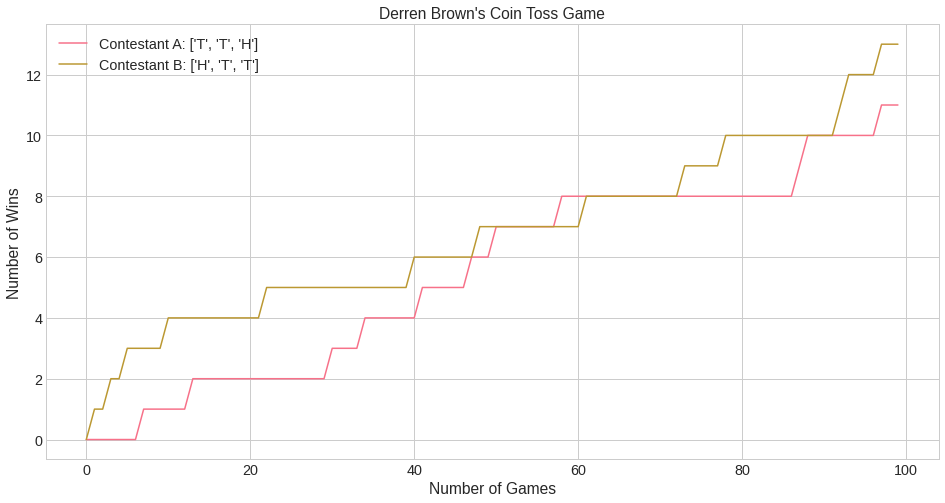

In [84]:
# Plot the cumulative wins for A and B
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
plt.xlabel("Number of Games")
plt.ylabel("Number of Wins")
plt.title("Derren Brown's Coin Toss Game")
plt.plot(A_wins_progress, label="Contestant A: " + str(A_choice))
plt.plot(B_wins_progress, label="Contestant B: " + str(B_choice))
plt.legend();

In [127]:
A_wins[0:20]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [128]:
B_wins[0:20]

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [125]:
# Determine who's won the game
from itertools import compress, count, islice
from functools import partial
from operator import eq

def nth_item(n, item, iterable):
    indicies = compress(count(), map(partial(eq, item), iterable))
    return next(indicies)
    #return next(islice(indicies, n, None), -1)

In [139]:
A_wins_progress

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9])

In [144]:
B_wins_progress

array([ 0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 14, 14,
       14, 14, 14, 14, 15, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17])

In [158]:
# Conditions for winning
## Condition 1: The first contestant to get the sequence they chose wins the game (first past the post).
## Condition 2: The first contestant to get n times to the sequence they chose wins the game (first to n successes).
### set n = 1, 3, 5, 10, 20, etc.

def who_won(sequence_A, sequence_B, num_wins=1):
    '''
    Given two sequences of the form A_wins_progress and B_wins_progress, determine who won the game.
    NOTE: A_wins_progress is a np array that is the cumulative sum of the list A_wins.
    num_wins is the condition for winning. 
    num_wins = 1 is the condition where the first contestant to obtain the pattern they chose is the winner. 
    num_wins = 2 is the condition where the first contestant to obtain their pattern twice is the winner. 
    num_wins = n is the condition where the first contestant to obtain their pattern n times is the winner.
    
    '''
    # Check the max number of wins in sequences A and B
    A_max = np.max(sequence_A)
    B_max = np.max(sequence_B)
    
    # Find the index number of the first occurrence of the value num_wins
    ## Handle it if num_wins doesn't occur in the sequence
    try:
        sequence_A_win_index = list(sequence_A).index(num_wins)
        sequence_B_win_index = list(sequence_B).index(num_wins)
    except ValueError:
        return print("Please use a smaller number of num_wins. The maximum value of num_wins is {}.".format(np.min([A_max, B_max])))

    
    # The smaller index number is the winner
    if sequence_A_win_index < sequence_B_win_index:
        winner = 'A'
    elif sequence_A_win_index > sequence_B_win_index:
        winner = 'B'
    else:
        winner = 'Draw'
    
    return winner

In [159]:
who_won(A_wins_progress, B_wins_progress, num_wins=70)

Please use a smaller number of num_wins. The maximum value of num_wins is 9.


In [261]:
def derren_game(A_choice, num_wins=1, display_plot=0, n_trials=200):
    '''
    A function for generating the results of Derren Brown's deep maths game about 
    coin tossing. Also called the "Penney Ante" game after the mathematician Penney who
    introduced it in the 1960s.
    
    A_choice is the result of a coin tossed thrice that contestant A makes, e.g., ['H', 'T', 'H']
    n_trials is the number of times the game is played
    
    num_wins is the condition for winning. See the who_won function above.
    
    Set display_plot=1 to show the plot of the results of the tosses
    
    '''
    
    # Contestant B's Choice 
    ## based on Contestant A's choice

    # Take the middle element and switch it
    ## this becomes the first choice
    if A_choice[1] == 'H':
        first_choice = 'T'
    else:
        first_choice = 'H'

    B_choice = [first_choice, A_choice[0], A_choice[1]]
    if display_plot == 1:
        print("Contestant A chose: {}\nContestant B chose: {}".format(A_choice, B_choice))
    
    # Generate n_trials for Contestants A and B
    A_trials = [np.random.choice(['H', 'T'], 3) for n in range(n_trials)]
    B_trials = [np.random.choice(['H', 'T'], 3) for n in range(n_trials)]
    
    # Identify the wins for each contestant
    A_wins = [1 if list(x) == choice_A else 0 for x in A_trials]
    B_wins = [1 if list(x) == choice_B else 0 for x in B_trials]
    
    # Build the cumulative sum of wins
    A_wins_progress = np.cumsum(A_wins)
    B_wins_progress = np.cumsum(B_wins)
    
    if display_plot == 1: 
    # Plot the cumulative wins for A and B
        fig, ax = plt.subplots(1, 1, figsize=(16, 8))
        plt.xlabel("Number of Games")
        plt.ylabel("Number of Wins")
        plt.title("Derren Brown's Coin Toss Game")
        plt.plot(A_wins_progress, label="Contestant A: " + str(A_choice))
        plt.plot(B_wins_progress, label="Contestant B: " + str(B_choice))
        plt.legend();
    else:
        return who_won(A_wins_progress, B_wins_progress, num_wins=num_wins)
    

In [262]:
choices = [['H', 'H', 'H'], 
           ['H', 'H', 'T'], 
           ['H', 'T', 'H'], 
           ['H', 'T', 'T'], 
           ['T', 'H', 'H'], 
           ['T', 'H', 'T'],
           ['T', 'T', 'H'],
           ['T', 'T', 'T']
          ]

Contestant A chose: ['T', 'T', 'T']
Contestant B chose: ['H', 'T', 'T']


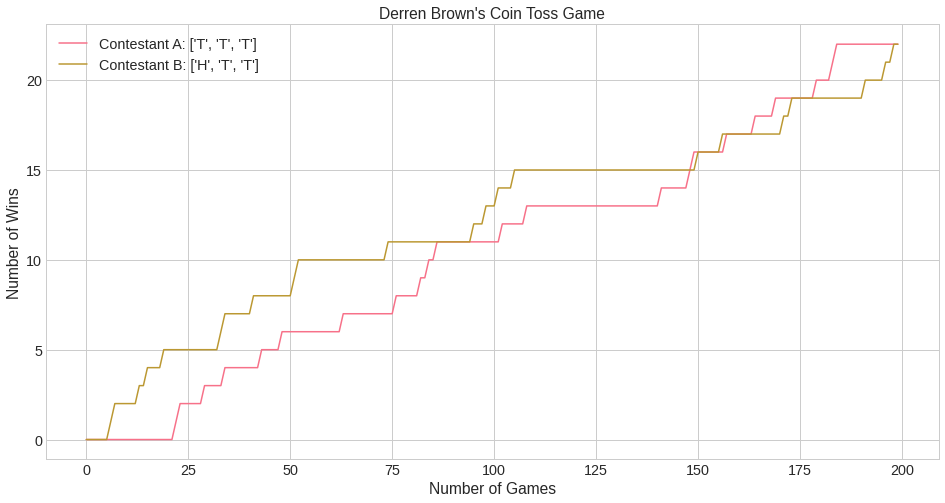

In [264]:
derren_game(choices[7], num_wins=1, display_plot=1)

In [266]:
derren_game(choices[7], num_wins=1, display_plot=0)

'B'

In [267]:
results_matrix = []
full_results_matrix = []

In [284]:
# Play the Derren Brown game n times 
## Turn off the plot because it'll get in the way otherwise
results_array = []
full_results_array = []
for j in range(1,11):
    n_games = 1000
    t0 = time.time()
    results_0_wins_1 = [derren_game(choices[7], num_wins=j, display_plot=0) for i in range(n_games)]
    print("Results calculated in {} seconds.".format(round(time.time()-t0, 3)))
    # Win ratio for A
    A_win_ratio = round(results_0_wins_1.count('A')/n_games, 3)
    # Win ratio for B
    B_win_ratio = round(results_0_wins_1.count('B')/n_games, 3)
    # Ratio of draws
    draw_ratio = round(results_0_wins_1.count('Draw')/n_games, 3)

    # Edge that B has
    B_edge = round(B_win_ratio/A_win_ratio, 3)

    full_results = [A_win_ratio, B_win_ratio, draw_ratio, B_edge]
    
    results_array.append(B_edge)
    full_results_array.append(full_results)
    
results_matrix.append(results_array)
full_results_matrix.append(full_results_array)
    
print("B-Edge Ratios = {}".format(results_array))

Results calculated in 7.39 seconds.
Results calculated in 7.333 seconds.
Results calculated in 7.272 seconds.
Results calculated in 7.368 seconds.
Results calculated in 7.335 seconds.
Results calculated in 7.367 seconds.
Results calculated in 7.542 seconds.
Results calculated in 7.462 seconds.
Results calculated in 7.431 seconds.
Results calculated in 7.566 seconds.
B-Edge Ratios = [0.985, 0.947, 1.0, 1.04, 0.984, 1.033, 0.936, 0.998, 1.054, 0.935]


In [285]:
results_matrix

[[0.998, 0.927, 1.006, 1.103, 1.019, 1.046, 0.982, 1.029, 1.069, 1.041],
 [0.938, 0.99, 0.902, 0.956, 1.135, 1.021, 0.966, 1.006, 0.958, 0.932],
 [0.936, 0.971, 0.966, 0.903, 1.037, 1.01, 1.116, 1.141, 1.033, 1.06],
 [0.991, 1.038, 0.998, 0.937, 1.099, 0.877, 0.937, 1.002, 0.939, 0.939],
 [0.919, 1.055, 0.913, 0.976, 0.974, 0.948, 1.05, 0.916, 1.033, 1.118],
 [0.96, 1.068, 0.973, 1.027, 1.016, 1.01, 1.072, 1.029, 0.992, 1.037],
 [1.083, 1.049, 0.97, 0.996, 0.974, 0.866, 0.976, 0.992, 1.058, 0.951],
 [0.985, 0.947, 1.0, 1.04, 0.984, 1.033, 0.936, 0.998, 1.054, 0.935]]

In [286]:
full_results_matrix

[[[0.469, 0.468, 0.063, 0.998],
  [0.504, 0.467, 0.029, 0.927],
  [0.487, 0.49, 0.023, 1.006],
  [0.468, 0.516, 0.016, 1.103],
  [0.484, 0.493, 0.023, 1.019],
  [0.482, 0.504, 0.014, 1.046],
  [0.5, 0.491, 0.009, 0.982],
  [0.487, 0.501, 0.012, 1.029],
  [0.479, 0.512, 0.009, 1.069],
  [0.484, 0.504, 0.012, 1.041]],
 [[0.48, 0.45, 0.07, 0.938],
  [0.486, 0.481, 0.033, 0.99],
  [0.511, 0.461, 0.028, 0.902],
  [0.499, 0.477, 0.024, 0.956],
  [0.459, 0.521, 0.02, 1.135],
  [0.486, 0.496, 0.018, 1.021],
  [0.501, 0.484, 0.015, 0.966],
  [0.491, 0.494, 0.015, 1.006],
  [0.504, 0.483, 0.013, 0.958],
  [0.513, 0.478, 0.009, 0.932]],
 [[0.484, 0.453, 0.063, 0.936],
  [0.489, 0.475, 0.036, 0.971],
  [0.499, 0.482, 0.019, 0.966],
  [0.515, 0.465, 0.02, 0.903],
  [0.482, 0.5, 0.018, 1.037],
  [0.49, 0.495, 0.015, 1.01],
  [0.464, 0.518, 0.018, 1.116],
  [0.461, 0.526, 0.013, 1.141],
  [0.487, 0.503, 0.01, 1.033],
  [0.482, 0.511, 0.007, 1.06]],
 [[0.467, 0.463, 0.07, 0.991],
  [0.477, 0.495, 0.02

In [307]:
column_names = columns=["Win 1 Game", 
                        "Win 2 Games", 
                        "Win 3 Games", 
                        "Win 4 Games", 
                        "Win 5 Games", 
                        "Win 6 Games", 
                        "Win 7 Games", 
                        "Win 8 Games", 
                        "Win 9 Games", 
                        "Win 10 Games"]

In [302]:
coin_patterns = ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']

In [308]:
# Convert the results_matrix and the full_results_matrix into dataframes
df_results_matrix = pd.DataFrame(results_matrix,columns=column_names)
df_results_matrix

,Win 1 Game,Win 2 Games,Win 3 Games,Win 4 Games,Win 5 Games,Win 6 Games,Win 7 Games,Win 8 Games,Win 9 Games,Win 10 Games
0,0.998,0.927,1.006,1.103,1.019,1.046,0.982,1.029,1.069,1.041
1,0.938,0.990,0.902,0.956,1.135,1.021,0.966,1.006,0.958,0.932
2,0.936,0.971,0.966,0.903,1.037,1.010,1.116,1.141,1.033,1.060
3,0.991,1.038,0.998,0.937,1.099,0.877,0.937,1.002,0.939,0.939
4,0.919,1.055,0.913,0.976,0.974,0.948,1.050,0.916,1.033,1.118
5,0.960,1.068,0.973,1.027,1.016,1.010,1.072,1.029,0.992,1.037
6,1.083,1.049,0.970,0.996,0.974,0.866,0.976,0.992,1.058,0.951
7,0.985,0.947,1.000,1.040,0.984,1.033,0.936,0.998,1.054,0.935


In [309]:
df_results_matrix.insert(0, "Coin Toss Pattern", coin_patterns) 

In [310]:
df_results_matrix

,Coin Toss Pattern,Win 1 Game,Win 2 Games,Win 3 Games,Win 4 Games,Win 5 Games,Win 6 Games,Win 7 Games,Win 8 Games,Win 9 Games,Win 10 Games
0,HHH,0.998,0.927,1.006,1.103,1.019,1.046,0.982,1.029,1.069,1.041
1,HHT,0.938,0.990,0.902,0.956,1.135,1.021,0.966,1.006,0.958,0.932
2,HTH,0.936,0.971,0.966,0.903,1.037,1.010,1.116,1.141,1.033,1.060
3,HTT,0.991,1.038,0.998,0.937,1.099,0.877,0.937,1.002,0.939,0.939
4,THH,0.919,1.055,0.913,0.976,0.974,0.948,1.050,0.916,1.033,1.118
5,THT,0.960,1.068,0.973,1.027,1.016,1.010,1.072,1.029,0.992,1.037
6,TTH,1.083,1.049,0.970,0.996,0.974,0.866,0.976,0.992,1.058,0.951
7,TTT,0.985,0.947,1.000,1.040,0.984,1.033,0.936,0.998,1.054,0.935


In [311]:
# Pickle this dataframe for later use
if 1 == 0: 
    pickle_df(df_results_matrix, os.path.join(pickled_dir_path, 'df_results_matrix.pkl'))

Dataframe has been pickled to ../pickled/df_results_matrix.pkl
Unpickle the dataframe using unpickle_df(destination)


In [306]:
full_results_matrix[0]

[[0.469, 0.468, 0.063, 0.998],
 [0.504, 0.467, 0.029, 0.927],
 [0.487, 0.49, 0.023, 1.006],
 [0.468, 0.516, 0.016, 1.103],
 [0.484, 0.493, 0.023, 1.019],
 [0.482, 0.504, 0.014, 1.046],
 [0.5, 0.491, 0.009, 0.982],
 [0.487, 0.501, 0.012, 1.029],
 [0.479, 0.512, 0.009, 1.069],
 [0.484, 0.504, 0.012, 1.041]]

In [312]:
column_names_full = columns=["Win 1 Game [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 2 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 3 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 4 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 5 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 6 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 7 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 8 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 9 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]", 
                             "Win 10 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]"]

In [313]:
# Convert the full_results_matrix into a dataframe
df_full_results_matrix = pd.DataFrame(full_results_matrix,columns=column_names_full)
df_full_results_matrix

,"Win 1 Game [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 2 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 3 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 4 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 5 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 6 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 7 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 8 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 9 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 10 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]"
0,"[0.469, 0.468, 0.063, 0.998]","[0.504, 0.467, 0.029, 0.927]","[0.487, 0.49, 0.023, 1.006]","[0.468, 0.516, 0.016, 1.103]","[0.484, 0.493, 0.023, 1.019]","[0.482, 0.504, 0.014, 1.046]","[0.5, 0.491, 0.009, 0.982]","[0.487, 0.501, 0.012, 1.029]","[0.479, 0.512, 0.009, 1.069]","[0.484, 0.504, 0.012, 1.041]"
1,"[0.48, 0.45, 0.07, 0.938]","[0.486, 0.481, 0.033, 0.99]","[0.511, 0.461, 0.028, 0.902]","[0.499, 0.477, 0.024, 0.956]","[0.459, 0.521, 0.02, 1.135]","[0.486, 0.496, 0.018, 1.021]","[0.501, 0.484, 0.015, 0.966]","[0.491, 0.494, 0.015, 1.006]","[0.504, 0.483, 0.013, 0.958]","[0.513, 0.478, 0.009, 0.932]"
2,"[0.484, 0.453, 0.063, 0.936]","[0.489, 0.475, 0.036, 0.971]","[0.499, 0.482, 0.019, 0.966]","[0.515, 0.465, 0.02, 0.903]","[0.482, 0.5, 0.018, 1.037]","[0.49, 0.495, 0.015, 1.01]","[0.464, 0.518, 0.018, 1.116]","[0.461, 0.526, 0.013, 1.141]","[0.487, 0.503, 0.01, 1.033]","[0.482, 0.511, 0.007, 1.06]"
3,"[0.467, 0.463, 0.07, 0.991]","[0.477, 0.495, 0.028, 1.038]","[0.491, 0.49, 0.019, 0.998]","[0.508, 0.476, 0.016, 0.937]","[0.467, 0.513, 0.02, 1.099]","[0.521, 0.457, 0.022, 0.877]","[0.51, 0.478, 0.012, 0.937]","[0.494, 0.495, 0.011, 1.002]","[0.509, 0.478, 0.013, 0.939]","[0.509, 0.478, 0.013, 0.939]"
4,"[0.483, 0.444, 0.073, 0.919]","[0.469, 0.495, 0.036, 1.055]","[0.507, 0.463, 0.03, 0.913]","[0.495, 0.483, 0.022, 0.976]","[0.497, 0.484, 0.019, 0.974]","[0.504, 0.478, 0.018, 0.948]","[0.483, 0.507, 0.01, 1.05]","[0.514, 0.471, 0.015, 0.916]","[0.486, 0.502, 0.012, 1.033]","[0.466, 0.521, 0.013, 1.118]"
5,"[0.475, 0.456, 0.069, 0.96]","[0.47, 0.502, 0.028, 1.068]","[0.49, 0.477, 0.033, 0.973]","[0.484, 0.497, 0.019, 1.027]","[0.486, 0.494, 0.02, 1.016]","[0.491, 0.496, 0.013, 1.01]","[0.475, 0.509, 0.016, 1.072]","[0.485, 0.499, 0.016, 1.029]","[0.495, 0.491, 0.013, 0.992]","[0.487, 0.505, 0.008, 1.037]"
6,"[0.444, 0.481, 0.075, 1.083]","[0.472, 0.495, 0.033, 1.049]","[0.494, 0.479, 0.027, 0.97]","[0.491, 0.489, 0.02, 0.996]","[0.5, 0.487, 0.013, 0.974]","[0.529, 0.458, 0.013, 0.866]","[0.498, 0.486, 0.016, 0.976]","[0.496, 0.492, 0.012, 0.992]","[0.48, 0.508, 0.012, 1.058]","[0.506, 0.481, 0.011, 0.951]"
7,"[0.467, 0.46, 0.073, 0.985]","[0.491, 0.465, 0.044, 0.947]","[0.488, 0.488, 0.024, 1.0]","[0.478, 0.497, 0.025, 1.04]","[0.494, 0.486, 0.02, 0.984]","[0.486, 0.502, 0.012, 1.033]","[0.512, 0.479, 0.009, 0.936]","[0.494, 0.493, 0.013, 0.998]","[0.48, 0.506, 0.014, 1.054]","[0.511, 0.478, 0.011, 0.935]"


In [314]:
df_full_results_matrix.insert(0, "Coin Toss Pattern", coin_patterns)

In [316]:
df_full_results_matrix

,Coin Toss Pattern,"Win 1 Game [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 2 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 3 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 4 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 5 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 6 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 7 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 8 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 9 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]","Win 10 Games [A_win_ratio, B_win_ratio, draw_ratio, B_edge]"
0,HHH,"[0.469, 0.468, 0.063, 0.998]","[0.504, 0.467, 0.029, 0.927]","[0.487, 0.49, 0.023, 1.006]","[0.468, 0.516, 0.016, 1.103]","[0.484, 0.493, 0.023, 1.019]","[0.482, 0.504, 0.014, 1.046]","[0.5, 0.491, 0.009, 0.982]","[0.487, 0.501, 0.012, 1.029]","[0.479, 0.512, 0.009, 1.069]","[0.484, 0.504, 0.012, 1.041]"
1,HHT,"[0.48, 0.45, 0.07, 0.938]","[0.486, 0.481, 0.033, 0.99]","[0.511, 0.461, 0.028, 0.902]","[0.499, 0.477, 0.024, 0.956]","[0.459, 0.521, 0.02, 1.135]","[0.486, 0.496, 0.018, 1.021]","[0.501, 0.484, 0.015, 0.966]","[0.491, 0.494, 0.015, 1.006]","[0.504, 0.483, 0.013, 0.958]","[0.513, 0.478, 0.009, 0.932]"
2,HTH,"[0.484, 0.453, 0.063, 0.936]","[0.489, 0.475, 0.036, 0.971]","[0.499, 0.482, 0.019, 0.966]","[0.515, 0.465, 0.02, 0.903]","[0.482, 0.5, 0.018, 1.037]","[0.49, 0.495, 0.015, 1.01]","[0.464, 0.518, 0.018, 1.116]","[0.461, 0.526, 0.013, 1.141]","[0.487, 0.503, 0.01, 1.033]","[0.482, 0.511, 0.007, 1.06]"
3,HTT,"[0.467, 0.463, 0.07, 0.991]","[0.477, 0.495, 0.028, 1.038]","[0.491, 0.49, 0.019, 0.998]","[0.508, 0.476, 0.016, 0.937]","[0.467, 0.513, 0.02, 1.099]","[0.521, 0.457, 0.022, 0.877]","[0.51, 0.478, 0.012, 0.937]","[0.494, 0.495, 0.011, 1.002]","[0.509, 0.478, 0.013, 0.939]","[0.509, 0.478, 0.013, 0.939]"
4,THH,"[0.483, 0.444, 0.073, 0.919]","[0.469, 0.495, 0.036, 1.055]","[0.507, 0.463, 0.03, 0.913]","[0.495, 0.483, 0.022, 0.976]","[0.497, 0.484, 0.019, 0.974]","[0.504, 0.478, 0.018, 0.948]","[0.483, 0.507, 0.01, 1.05]","[0.514, 0.471, 0.015, 0.916]","[0.486, 0.502, 0.012, 1.033]","[0.466, 0.521, 0.013, 1.118]"
5,THT,"[0.475, 0.456, 0.069, 0.96]","[0.47, 0.502, 0.028, 1.068]","[0.49, 0.477, 0.033, 0.973]","[0.484, 0.497, 0.019, 1.027]","[0.486, 0.494, 0.02, 1.016]","[0.491, 0.496, 0.013, 1.01]","[0.475, 0.509, 0.016, 1.072]","[0.485, 0.499, 0.016, 1.029]","[0.495, 0.491, 0.013, 0.992]","[0.487, 0.505, 0.008, 1.037]"
6,TTH,"[0.444, 0.481, 0.075, 1.083]","[0.472, 0.495, 0.033, 1.049]","[0.494, 0.479, 0.027, 0.97]","[0.491, 0.489, 0.02, 0.996]","[0.5, 0.487, 0.013, 0.974]","[0.529, 0.458, 0.013, 0.866]","[0.498, 0.486, 0.016, 0.976]","[0.496, 0.492, 0.012, 0.992]","[0.48, 0.508, 0.012, 1.058]","[0.506, 0.481, 0.011, 0.951]"
7,TTT,"[0.467, 0.46, 0.073, 0.985]","[0.491, 0.465, 0.044, 0.947]","[0.488, 0.488, 0.024, 1.0]","[0.478, 0.497, 0.025, 1.04]","[0.494, 0.486, 0.02, 0.984]","[0.486, 0.502, 0.012, 1.033]","[0.512, 0.479, 0.009, 0.936]","[0.494, 0.493, 0.013, 0.998]","[0.48, 0.506, 0.014, 1.054]","[0.511, 0.478, 0.011, 0.935]"


In [317]:
# Pickle this dataframe for later use
if 1 == 1: 
    pickle_df(df_full_results_matrix, os.path.join(pickled_dir_path, 'df_full_results_matrix.pkl'))

Dataframe has been pickled to ../pickled/df_full_results_matrix.pkl
Unpickle the dataframe using unpickle_df(destination)


## STOP HERE